# Final Project_Sina Alba

# Liver Cirrhosis Prediction

Liver cirrhosis prediction using six classification alghorithms
By Sina Alba

Linkedin : https://www.linkedin.com/in/sina-alba-8147941a3

Email : sinaalba2020@gail.com

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(
    'cirrhosis.csv',
    index_col=0,
    parse_dates=True
)

In [3]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.shape

(418, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

# Attribute Information


1) ID: unique identifier


2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986


3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)


4) Drug: type of drug D-penicillamine or placebo


5) Age: age in [days]


6) Sex: M (male) or F (female)


7) Ascites: presence of ascites N (No) or Y (Yes)


8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)


9) Spiders: presence of spiders N (No) or Y (Yes)


10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)


11) Bilirubin: serum bilirubin in [mg/dl]


12) Cholesterol: serum cholesterol in [mg/dl]


13) Albumin: albumin in [gm/dl]


14) Copper: urine copper in [ug/day]


15) Alk_Phos: alkaline phosphatase in [U/liter]


16) SGOT: SGOT in [U/ml]


17) Triglycerides: triglicerides in [mg/dl]


18) Platelets: platelets per cubic [ml/1000]


19) Prothrombin: prothrombin time in seconds [s]


20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [6]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


# Converting Values from Days to Years in "Age" Column


In [7]:
df["Age"] = (df["Age"]/365)

In [8]:
df["Age"] = df["Age"].astype("int64")

In [9]:
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Handling Missing Values

In [10]:
pd.isnull(np.nan)


True

In [11]:
df.isnull()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
415,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False
416,False,False,True,False,False,True,True,True,False,False,True,False,True,True,True,True,False,False,False


In [12]:
df.isnull().sum()


N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

# We have two different types of data

1.Numerical data ( Age, Cholesterol, Platelets.. etc)

2.Categorical Data ( Drug, Sex, Spiders..etc)

We will have to use different imputation for each type


1.For the numerical type we can use mean or median. In this case we will go with median to avoid skewing in the presence of outliers

2.For Categorical type we will impute the most frequent class.


In [13]:
# For Numerical Type

In [14]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [15]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

In [16]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()


N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [17]:
# For Categorical type


In [18]:
df.select_dtypes(include=('object')).isna().sum()


Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [19]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    


In [20]:
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [21]:
df.duplicated().sum()


0

In [22]:
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Detect Outliers 

Z-score treatment for N_Days, Age, Bilirubin

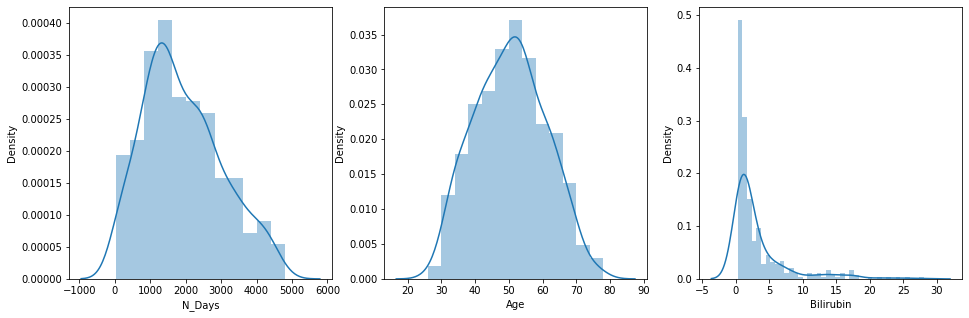

In [23]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['N_Days'])
plt.subplot(1,3,2)
sns.distplot(df['Age'])
plt.subplot(1,3,3)
sns.distplot(df['Bilirubin'])
plt.show()


N-days

In [24]:
print("Highest allowed",df['N_Days'].mean() + 3*df['N_Days'].std())
print("Lowest allowed",df['N_Days'].mean() - 3*df['N_Days'].std())

Highest allowed 5231.801273822914
Lowest allowed -1396.2366805214785


In [25]:
df[(df['N_Days'] > 5231.80) | (df['N_Days'] < -1396.23)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,


In [26]:
df['N_Days'].describe()

count     418.000000
mean     1917.782297
std      1104.672992
min        41.000000
25%      1092.750000
50%      1730.000000
75%      2613.500000
max      4795.000000
Name: N_Days, dtype: float64

Age

In [27]:
print("Highest allowed",df['Age'].mean() + 3*df['Age'].std())
print("Lowest allowed",df['Age'].mean() - 3*df['Age'].std())

Highest allowed 81.82602855556581
Lowest allowed 18.939521683668627


In [28]:
df[(df['Age'] > 81.82) | (df['Age'] < 18.93)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,


In [29]:
df['Age'].describe()

count    418.000000
mean      50.382775
std       10.481084
min       26.000000
25%       42.000000
50%       51.000000
75%       58.000000
max       78.000000
Name: Age, dtype: float64

Bilirubin

In [30]:
print("Highest allowed",df['Bilirubin'].mean() + 3*df['Bilirubin'].std())
print("Lowest allowed",df['Bilirubin'].mean() - 3*df['Bilirubin'].std())

Highest allowed 16.443332549553304
Lowest allowed -10.00170575529493


In [31]:
df[(df['Bilirubin'] > 16.44) | (df['Bilirubin'] < -10.00)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
23,264,D,Placebo,56,F,Y,Y,Y,Y,17.4,395.0,2.94,558.0,6064.8,227.04,191.0,214.0,11.7,4.0
27,77,D,Placebo,54,F,Y,Y,Y,S,21.6,175.0,3.31,221.0,3697.4,101.91,168.0,80.0,12.0,4.0
28,549,D,Placebo,44,F,Y,Y,Y,Y,17.2,222.0,3.23,209.0,1975.0,189.10,195.0,144.0,13.0,4.0
63,859,D,Placebo,46,F,N,N,Y,Y,22.5,932.0,3.12,95.0,5396.0,244.90,133.0,165.0,11.6,3.0
69,1170,D,D-penicillamine,49,F,N,Y,Y,S,20.0,652.0,3.46,159.0,3292.0,215.45,184.0,227.0,12.4,3.0
75,1191,D,D-penicillamine,43,F,Y,Y,Y,S,17.1,674.0,2.53,207.0,2078.0,182.90,598.0,268.0,11.5,4.0
95,130,D,Placebo,46,F,Y,Y,Y,Y,17.4,309.5,2.64,182.0,559.0,119.35,108.0,401.0,11.7,2.0
130,1413,D,Placebo,44,F,N,Y,Y,N,17.4,1775.0,3.43,205.0,2065.0,165.85,97.0,418.0,11.5,3.0
144,943,D,Placebo,52,F,N,Y,N,S,28.0,556.0,3.26,152.0,3896.0,198.40,171.0,335.0,10.0,3.0


In [32]:
new_df = df[(df['Bilirubin'] < 16.44) & (df['Bilirubin'] > -10.00)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [33]:
upper_limit = df['Bilirubin'].mean() + 3*df['Bilirubin'].std()
lower_limit = df['Bilirubin'].mean() - 3*df['Bilirubin'].std()

In [34]:
df['Bilirubin'] = np.where(
    df['Bilirubin']>upper_limit,
    upper_limit,
    np.where(
        df['Bilirubin']<lower_limit,
        lower_limit,
        df['Bilirubin']
    )
)

In [35]:
df['Bilirubin'].describe()

count    418.000000
mean       3.099434
std        3.913970
min        0.300000
25%        0.800000
50%        1.400000
75%        3.400000
max       16.443333
Name: Bilirubin, dtype: float64

Z-score treatment for Cholesterol, Albumin, Copper

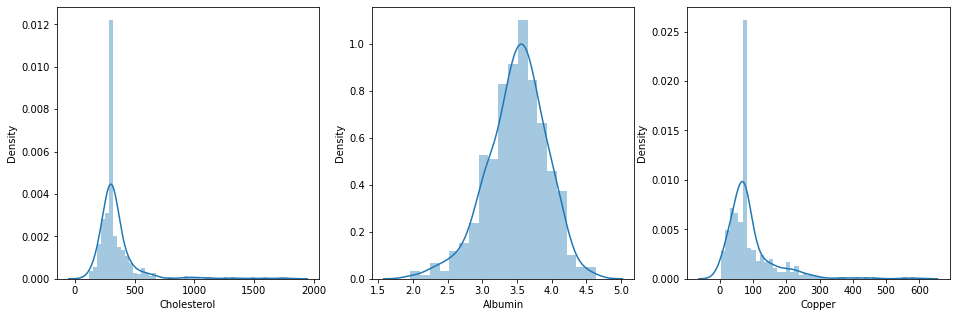

In [36]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['Cholesterol'])
plt.subplot(1,3,2)
sns.distplot(df['Albumin'])
plt.subplot(1,3,3)
sns.distplot(df['Copper'])
plt.show()

Cholesterol

In [37]:
print("Highest allowed",df['Cholesterol'].mean() + 3*df['Cholesterol'].std())
print("Lowest allowed",df['Cholesterol'].mean() - 3*df['Cholesterol'].std())

Highest allowed 929.6444052165157
Lowest allowed -229.09895067106117


In [38]:
df[(df['Cholesterol'] > 929.64) | (df['Cholesterol'] < -229.09)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
26,1444,D,Placebo,52,F,N,Y,Y,N,5.200000,1128.0,3.68,53.0,3228.0,165.85,166.0,421.0,9.9,3.0
63,859,D,Placebo,46,F,N,N,Y,Y,16.443333,932.0,3.12,95.0,5396.0,244.90,133.0,165.0,11.6,3.0
86,1657,D,D-penicillamine,52,F,N,Y,Y,N,5.000000,1600.0,3.21,75.0,2656.0,82.15,174.0,181.0,10.9,3.0
117,1083,D,D-penicillamine,49,F,N,Y,Y,N,6.500000,950.0,3.11,111.0,2374.0,170.50,149.0,354.0,11.0,4.0
130,1413,D,Placebo,44,F,N,Y,Y,N,16.443333,1775.0,3.43,205.0,2065.0,165.85,97.0,418.0,11.5,3.0
148,1427,D,Placebo,30,F,N,Y,N,N,7.200000,1015.0,3.26,247.0,3836.0,198.40,280.0,330.0,9.8,3.0
166,2721,C,Placebo,41,F,N,Y,N,N,5.700000,1480.0,3.26,84.0,1960.0,457.25,108.0,213.0,9.5,2.0
191,216,D,Placebo,52,F,Y,Y,Y,N,16.443333,1092.0,3.35,233.0,3740.0,147.25,432.0,399.0,15.2,4.0
193,797,D,Placebo,56,F,N,N,N,N,10.800000,932.0,3.19,267.0,2184.0,161.20,157.0,382.0,10.4,4.0


In [39]:
new_df = df[(df['Cholesterol'] < 929.64) & (df['Bilirubin'] > -229.09)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [40]:
upper_limit = df['Cholesterol'].mean() + 3*df['Cholesterol'].std()
lower_limit = df['Cholesterol'].mean() - 3*df['Cholesterol'].std()

In [41]:
df['Cholesterol'] = np.where(
    df['Cholesterol']>upper_limit,
    upper_limit,
    np.where(
        df['Cholesterol']<lower_limit,
        lower_limit,
        df['Cholesterol']
    )
)

In [42]:
df['Cholesterol'].describe()

count    418.000000
mean     340.362147
std      140.818628
min      120.000000
25%      273.000000
50%      309.500000
75%      347.750000
max      929.644405
Name: Cholesterol, dtype: float64

Albumin

In [43]:
print("Highest allowed",df['Albumin'].mean() + 3*df['Albumin'].std())
print("Lowest allowed",df['Albumin'].mean() - 3*df['Albumin'].std())

Highest allowed 4.772355008726417
Lowest allowed 2.2225253740487014


In [44]:
df[(df['Albumin'] > 4.77) | (df['Albumin'] < 2.22)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
231,1165,D,Placebo,58,F,N,Y,Y,N,3.400000,518.0,1.96,115.0,2250.0,203.05,90.0,190.0,10.7,4.0
281,41,D,D-penicillamine,65,F,Y,N,N,Y,16.443333,175.0,2.10,220.0,705.0,338.00,229.0,62.0,12.9,4.0


In [45]:
new_df = df[(df['Albumin'] < 4.77) & (df['Albumin'] > 2.22)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [46]:
upper_limit = df['Albumin'].mean() + 3*df['Albumin'].std()
lower_limit = df['Albumin'].mean() - 3*df['Albumin'].std()

In [47]:
df['Albumin'] = np.where(
    df['Albumin']>upper_limit,
    upper_limit,
    np.where(
        df['Albumin']<lower_limit,
        lower_limit,
        df['Albumin']
    )
)

In [48]:
df['Albumin'].describe()

count    418.000000
mean       3.498361
std        0.421953
min        2.222525
25%        3.242500
50%        3.530000
75%        3.770000
max        4.640000
Name: Albumin, dtype: float64

Copper

In [49]:
print("Highest allowed",df['Copper'].mean() + 3*df['Copper'].std())
print("Lowest allowed",df['Copper'].mean() - 3*df['Copper'].std())

Highest allowed 314.7363483840703
Lowest allowed -132.1765397716301


In [50]:
df[(df['Copper'] > 314.73) | (df['Copper'] < -132.17)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
18,131,D,D-penicillamine,53,F,N,Y,Y,Y,11.400000,178.0,2.80,588.0,961.0,280.55,200.0,283.0,12.4,4.0
22,673,D,D-penicillamine,56,F,N,N,Y,N,3.400000,271.0,3.63,464.0,1376.0,120.90,55.0,173.0,11.6,4.0
23,264,D,Placebo,56,F,Y,Y,Y,Y,16.443333,395.0,2.94,558.0,6064.8,227.04,191.0,214.0,11.7,4.0
120,2033,CL,D-penicillamine,35,M,N,N,N,N,3.500000,325.0,3.98,444.0,766.0,130.20,210.0,344.0,10.6,3.0
184,974,D,Placebo,37,F,N,Y,N,N,11.000000,674.0,3.55,358.0,2412.0,167.40,140.0,471.0,9.8,3.0
233,1932,C,D-penicillamine,42,F,N,Y,Y,N,0.900000,514.0,3.06,412.0,2622.0,105.40,87.0,284.0,9.8,4.0
253,1765,C,D-penicillamine,78,M,Y,Y,Y,N,7.100000,243.0,3.03,380.0,983.0,158.10,154.0,97.0,11.2,4.0


In [51]:
new_df = df[(df['Copper'] < 314.73) & (df['Copper'] > -132.17)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [52]:
upper_limit = df['Copper'].mean() + 3*df['Copper'].std()
lower_limit = df['Copper'].mean() - 3*df['Copper'].std()

In [53]:
df['Copper'] = np.where(
    df['Copper']>upper_limit,
    upper_limit,
    np.where(
        df['Copper']<lower_limit,
        lower_limit,
        df['Copper']
    )
)

In [54]:
df['Copper'].describe()

count    418.000000
mean      88.885537
std       63.386349
min        4.000000
25%       51.250000
50%       73.000000
75%      100.750000
max      314.736348
Name: Copper, dtype: float64

Z-score treatment for Alk_Phos, SGOT, Tryglicerides

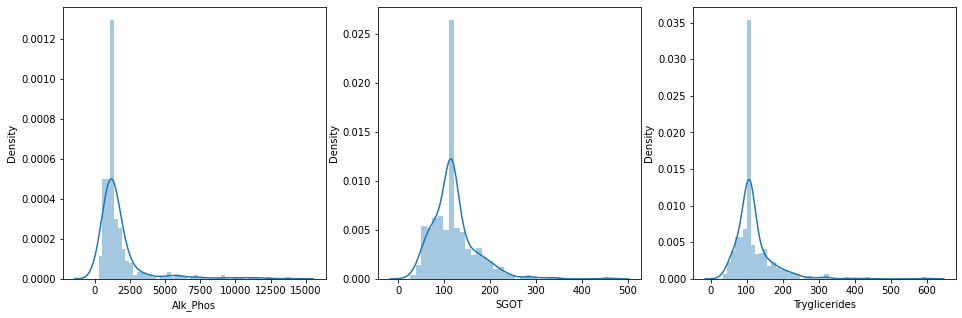

In [55]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(df['Alk_Phos'])
plt.subplot(1,3,2)
sns.distplot(df['SGOT'])
plt.subplot(1,3,3)
sns.distplot(df['Tryglicerides'])
plt.show()

Alk_Phos

In [56]:
print("Highest allowed",df['Alk_Phos'].mean() + 3*df['Alk_Phos'].std())
print("Lowest allowed",df['Alk_Phos'].mean() - 3*df['Alk_Phos'].std())

Highest allowed 7424.510921879259
Lowest allowed -3826.220969726149


In [57]:
df[(df['Alk_Phos'] > 7424.51) | (df['Alk_Phos'] < -3826.22)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
15,3584,D,D-penicillamine,64,F,N,N,N,N,0.8,231.0,3.87,173.0,9009.8,127.71,96.0,295.0,11.0,3.0
31,3839,D,Placebo,41,F,N,Y,N,N,4.7,296.0,3.44,114.0,9933.2,206.40,101.0,195.0,10.3,2.0
35,2847,D,Placebo,48,F,N,N,N,N,1.2,314.0,3.20,201.0,12258.8,72.24,151.0,431.0,10.6,3.0
39,2297,D,D-penicillamine,55,F,N,Y,N,N,0.7,282.0,3.00,52.0,9066.8,72.24,111.0,563.0,10.6,4.0
40,4467,C,D-penicillamine,46,F,N,N,N,N,1.3,309.5,3.34,105.0,11046.6,104.49,108.0,358.0,11.0,4.0
42,4453,C,Placebo,33,F,N,Y,Y,N,2.1,309.5,3.54,122.0,8778.0,56.76,108.0,344.0,11.0,4.0
46,2256,D,D-penicillamine,45,F,N,Y,N,N,5.7,482.0,2.84,161.0,11552.0,136.74,165.0,518.0,12.7,3.0
48,4427,C,Placebo,49,M,N,N,N,N,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,214.0,11.0,3.0
55,1360,D,D-penicillamine,65,M,N,N,N,N,1.8,416.0,3.94,121.0,10165.0,79.98,219.0,213.0,11.0,3.0


In [58]:
new_df = df[(df['Alk_Phos'] < 7424.51) & (df['Alk_Phos'] > -3826.22)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [59]:
upper_limit = df['Alk_Phos'].mean() + 3*df['Alk_Phos'].std()
lower_limit = df['Alk_Phos'].mean() - 3*df['Alk_Phos'].std()

In [60]:
df['Alk_Phos'] = np.where(
    df['Alk_Phos']>upper_limit,
    upper_limit,
    np.where(
        df['Alk_Phos']<lower_limit,
        lower_limit,
        df['Alk_Phos']
    )
)

In [61]:
df['Alk_Phos'].describe()

count     418.000000
mean     1713.216103
std      1484.649257
min       289.000000
25%      1016.250000
50%      1259.000000
75%      1707.750000
max      7424.510922
Name: Alk_Phos, dtype: float64

SGOT

In [62]:
print("Highest allowed",df['SGOT'].mean() + 3*df['SGOT'].std())
print("Lowest allowed",df['SGOT'].mean() - 3*df['SGOT'].std())

Highest allowed 267.81934877970343
Lowest allowed -26.69121480841156


In [63]:
df[(df['SGOT'] > 267.81) | (df['SGOT'] < -26.69)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
18,131,D,D-penicillamine,53,F,N,Y,Y,Y,11.400000,178.000000,2.800000,314.736348,961.0,280.55,200.0,283.0,12.4,4.0
67,2769,D,Placebo,51,F,N,N,N,N,1.100000,466.000000,3.910000,84.000000,1787.0,328.60,185.0,261.0,10.0,3.0
128,1037,D,D-penicillamine,41,F,N,Y,Y,N,16.200000,309.500000,2.890000,42.000000,1828.0,299.15,108.0,123.0,12.6,4.0
166,2721,C,Placebo,41,F,N,Y,N,N,5.700000,929.644405,3.260000,84.000000,1960.0,457.25,108.0,213.0,9.5,2.0
244,1690,D,D-penicillamine,44,F,N,N,Y,N,3.900000,350.000000,3.220000,121.000000,1268.0,272.80,231.0,270.0,9.6,3.0
281,41,D,D-penicillamine,65,F,Y,N,N,Y,16.443333,175.000000,2.222525,220.000000,705.0,338.00,229.0,62.0,12.9,4.0
305,1216,C,Placebo,43,F,N,Y,Y,N,2.900000,426.000000,3.610000,73.000000,5184.0,288.00,144.0,275.0,10.6,3.0


In [64]:
new_df = df[(df['SGOT'] <  267.81) & (df['SGOT'] > -26.69)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [65]:
upper_limit = df['SGOT'].mean() + 3*df['SGOT'].std()
lower_limit = df['SGOT'].mean() - 3*df['SGOT'].std()

In [66]:
df['SGOT'] = np.where(
    df['SGOT']>upper_limit,
    upper_limit,
    np.where(
        df['SGOT']<lower_limit,
        lower_limit,
        df['SGOT']
    )
)

In [67]:
df['SGOT'].describe()

count    418.000000
mean     119.631975
std       44.975596
min       26.350000
25%       91.000000
50%      114.700000
75%      135.750000
max      267.819349
Name: SGOT, dtype: float64

Tryglicerides

In [68]:
print("Highest allowed",df['Tryglicerides'].mean() + 3*df['Tryglicerides'].std())
print("Lowest allowed",df['Tryglicerides'].mean() - 3*df['Tryglicerides'].std())

Highest allowed 281.4200155198973
Lowest allowed -42.88413035243316


In [69]:
df[(df['Tryglicerides'] > 281.42) | (df['Tryglicerides'] < -42.88)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
56,1847,D,Placebo,33,F,N,Y,Y,N,1.100000,498.000000,3.80,88.0,7424.510922,95.46,319.0,365.0,10.6,2.0
74,1827,D,D-penicillamine,51,F,N,Y,Y,N,8.400000,558.000000,3.99,280.0,967.000000,89.90,309.0,278.0,11.0,4.0
75,1191,D,D-penicillamine,43,F,Y,Y,Y,S,16.443333,674.000000,2.53,207.0,2078.000000,182.90,598.0,268.0,11.5,4.0
81,2540,D,D-penicillamine,63,F,N,Y,Y,N,14.400000,448.000000,3.65,34.0,1218.000000,60.45,318.0,385.0,11.7,4.0
116,3336,C,D-penicillamine,61,F,N,N,Y,S,3.000000,458.000000,3.63,74.0,1588.000000,106.95,382.0,438.0,9.9,3.0
191,216,D,Placebo,52,F,Y,Y,Y,N,16.443333,929.644405,3.35,233.0,3740.000000,147.25,432.0,399.0,15.2,4.0
241,837,CL,Placebo,41,F,N,Y,Y,N,4.400000,316.000000,3.62,308.0,1119.000000,114.70,322.0,282.0,9.8,4.0


In [70]:
new_df = df[(df['Tryglicerides'] <  281.42) & (df['Tryglicerides'] > -42.88)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [71]:
upper_limit = df['Tryglicerides'].mean() + 3*df['Tryglicerides'].std()
lower_limit = df['Tryglicerides'].mean() - 3*df['Tryglicerides'].std()

In [72]:
df['Tryglicerides'] = np.where(
    df['Tryglicerides']>upper_limit,
    upper_limit,
    np.where(
        df['Tryglicerides']<lower_limit,
        lower_limit,
        df['Tryglicerides']
    )
)

In [73]:
df['Tryglicerides'].describe()

count    418.000000
mean     117.569235
std       45.111191
min       33.000000
25%       95.000000
50%      108.000000
75%      127.750000
max      281.420016
Name: Tryglicerides, dtype: float64

Z-score treatment for Platelets, Prothrombin

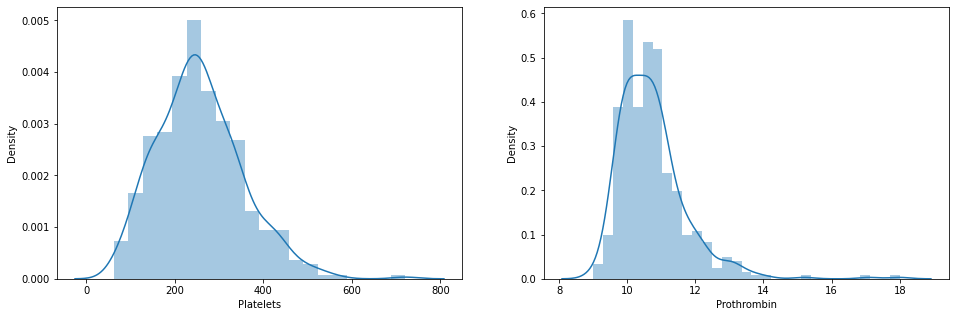

In [74]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Platelets'])
plt.subplot(1,2,2)
sns.distplot(df['Prothrombin'])
plt.show()

Platelets

In [75]:
print("Highest allowed",df['Platelets'].mean() + 3*df['Platelets'].std())
print("Lowest allowed",df['Platelets'].mean() - 3*df['Platelets'].std())

Highest allowed 547.9406129944152
Lowest allowed -34.20855557814724


In [76]:
df[(df['Platelets'] > 547.94) | (df['Platelets'] < -34.20)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
39,2297,D,D-penicillamine,55,F,N,Y,N,N,0.7,282.0,3.00,52.0,7424.510922,72.24,111.0,563.0,10.6,4.0
334,466,D,D-penicillamine,56,F,N,Y,N,N,7.1,309.5,3.51,73.0,1259.000000,114.70,108.0,721.0,11.8,3.0


In [77]:
new_df = df[(df['Platelets'] <  547.94) & (df['Platelets'] > -34.20)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [78]:
upper_limit = df['Platelets'].mean() + 3*df['Platelets'].std()
lower_limit = df['Platelets'].mean() - 3*df['Platelets'].std()

In [79]:
df['Platelets'] = np.where(
    df['Platelets']>upper_limit,
    upper_limit,
    np.where(
        df['Platelets']<lower_limit,
        lower_limit,
        df['Platelets']
    )
)

In [80]:
df['Platelets'].describe()

count    418.000000
mean     256.415984
std       95.281865
min       62.000000
25%      190.000000
50%      251.000000
75%      315.500000
max      547.940613
Name: Platelets, dtype: float64

Prothrombin

In [81]:
print("Highest allowed",df['Prothrombin'].mean() + 3*df['Prothrombin'].std())
print("Lowest allowed",df['Prothrombin'].mean() - 3*df['Prothrombin'].std())

Highest allowed 13.78986201999377
Lowest allowed 7.67233893694403


In [82]:
df[(df['Prothrombin'] > 13.78) | (df['Platelets'] < 7.67)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
107,3388,C,Placebo,62,F,N,N,N,N,0.600000,212.000000,4.03,10.0,648.0,71.30,77.000000,316.0,17.1,1.0
154,140,D,D-penicillamine,69,M,N,N,Y,Y,2.400000,168.000000,2.56,225.0,1056.0,120.90,75.000000,108.0,14.1,3.0
191,216,D,Placebo,52,F,Y,Y,Y,N,16.443333,929.644405,3.35,233.0,3740.0,147.25,281.420016,399.0,15.2,4.0
325,4795,C,D-penicillamine,34,F,N,Y,N,N,1.800000,309.500000,3.24,73.0,1259.0,114.70,108.000000,251.0,18.0,2.0
338,791,D,D-penicillamine,47,F,N,Y,N,N,16.000000,309.500000,3.42,73.0,1259.0,114.70,108.000000,475.0,13.8,2.0


In [83]:
new_df = df[(df['Prothrombin'] <  13.78) & (df['Prothrombin'] > 7.67)]
new_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,681,D,D-penicillamine,67,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
415,1103,C,D-penicillamine,39,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
416,1055,C,D-penicillamine,57,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0


In [84]:
upper_limit = df['Prothrombin'].mean() + 3*df['Prothrombin'].std()
lower_limit = df['Prothrombin'].mean() - 3*df['Prothrombin'].std()

In [85]:
df['Prothrombin'] = np.where(
    df['Prothrombin']>upper_limit,
    upper_limit,
    np.where(
        df['Prothrombin']<lower_limit,
        lower_limit,
        df['Prothrombin']
    )
)

In [86]:
df['Prothrombin'].describe()

count    418.000000
mean      10.708970
std        0.910810
min        9.000000
25%       10.000000
50%       10.600000
75%       11.100000
max       13.789862
Name: Prothrombin, dtype: float64

# Exploratory Data Analysis and visualizations


We know that the liver has four health states

1.Healthy Liver

2.Fatty Liver

3.Fibrosis Liver 

4.Cirrhosis Liver

Lets take a look at how many examples per calss do we have in our dataset.

In [87]:
df['Stage'].value_counts()


3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Number of Example Per Class')

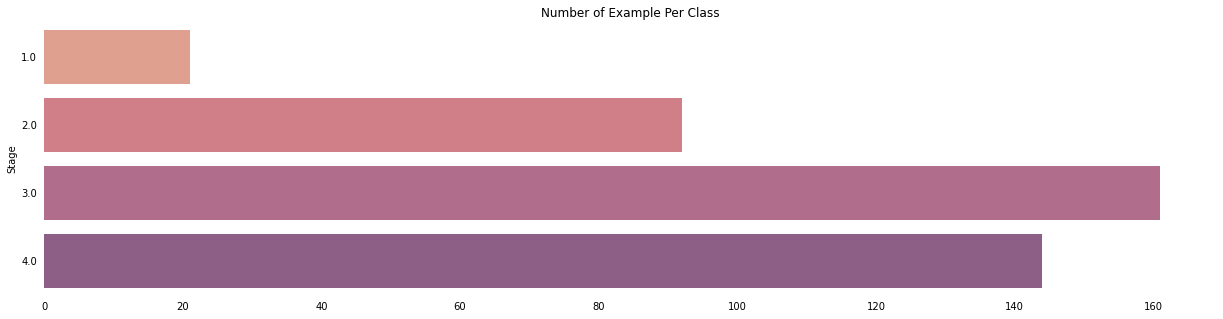

In [88]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

Also,  the  proportions  of  disease  stages  can  be  seen  in  the  subcategories  of  categoricalgroups

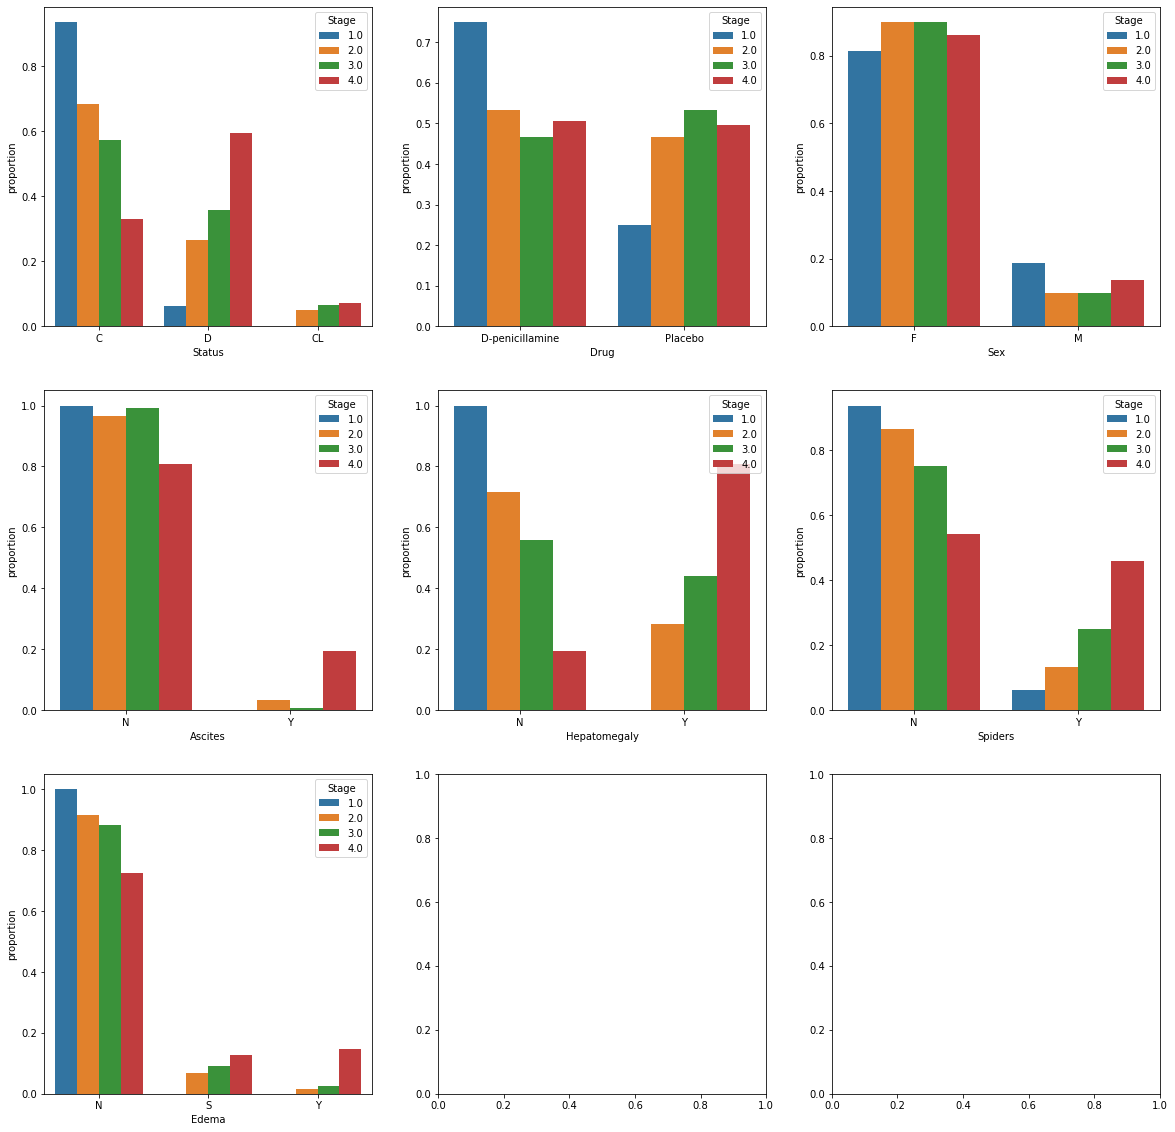

In [89]:
fig, axes = plt.subplots(3, 3, figsize = (20, 20))
axes = axes.flatten()
short_df = df.iloc[: 305]
for i, column in enumerate(df.loc[:, :'Stage'].select_dtypes('O')):
    data = short_df[column].groupby(df['Stage']).value_counts(normalize = True).rename('proportion').to_frame().reset_index()
    sns.barplot(x = column, y = 'proportion', hue = 'Stage', data = data, ax = axes[i])

To further determine the path, it is necessary to draw a Correlations Between Variableschart.

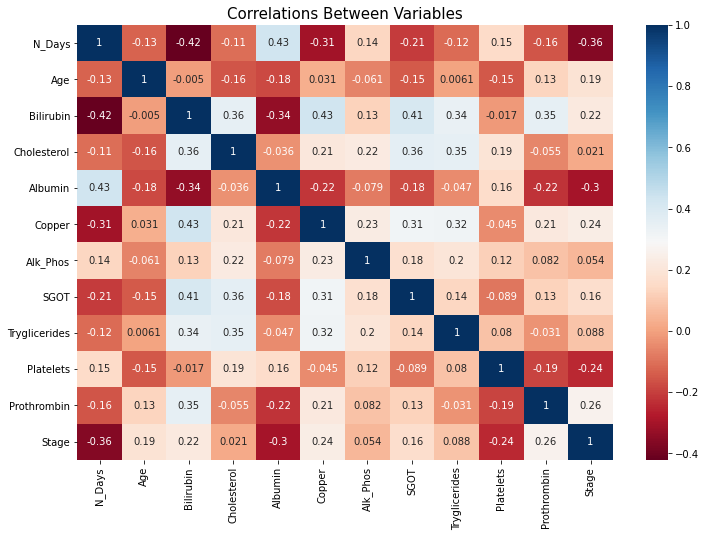

In [90]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

According to this chart, it is necessary to compare the disease stages with the six charac-teristics of Age, Prothrombin, Copper, Platelets, Albumin, and Cholesterol.  

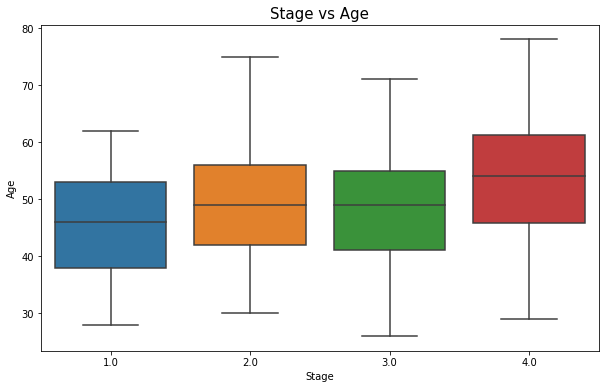

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Stage"], y=df["Age"])
plt.title("Stage vs Age", size=15)
plt.show()

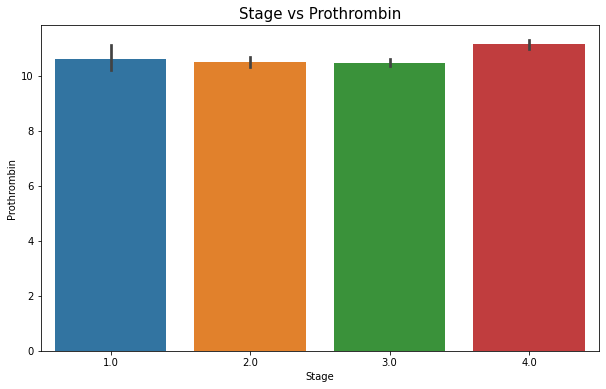

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Stage"], y=df["Prothrombin"])
plt.title("Stage vs Prothrombin", size=15)
plt.show()

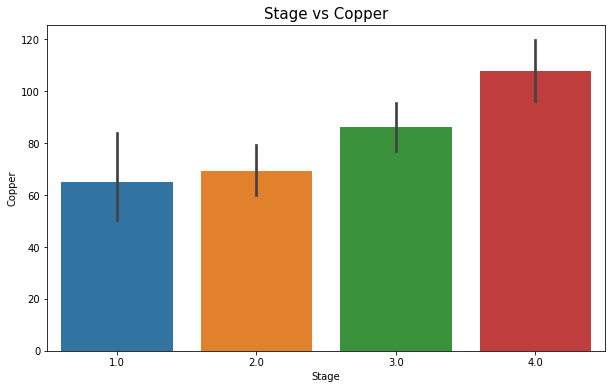

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Stage"], y=df["Copper"])
plt.title("Stage vs Copper", size=15)
plt.show()

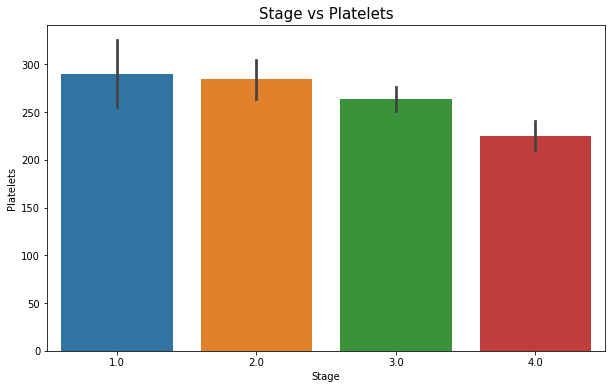

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Stage"], y=df["Platelets"])
plt.title("Stage vs Platelets", size=15)
plt.show()

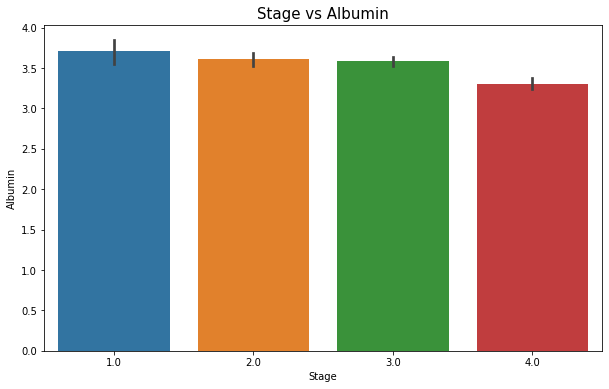

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Stage"], y=df["Albumin"])
plt.title("Stage vs Albumin", size=15)
plt.show()

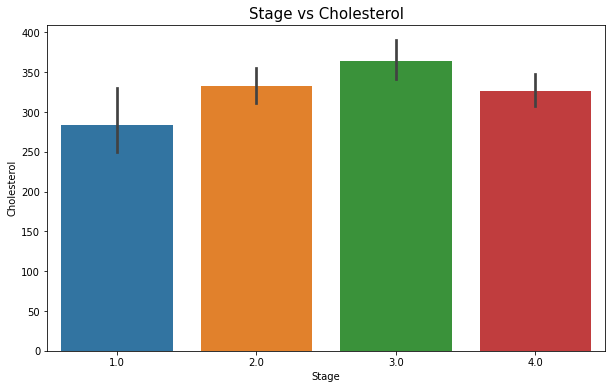

In [97]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Stage"], y=df["Cholesterol"])
plt.title("Stage vs Cholesterol", size=15)
plt.show()

Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

# Regression Plots of Positive Correlated Features.


Looking at the feature distribution we can observe that in features such as Age, Prothrombin, Copper the risk of the disease increase with increase in feature value, thus having a positive co-relation on with the disease probability. Lets fit a regression line to check.

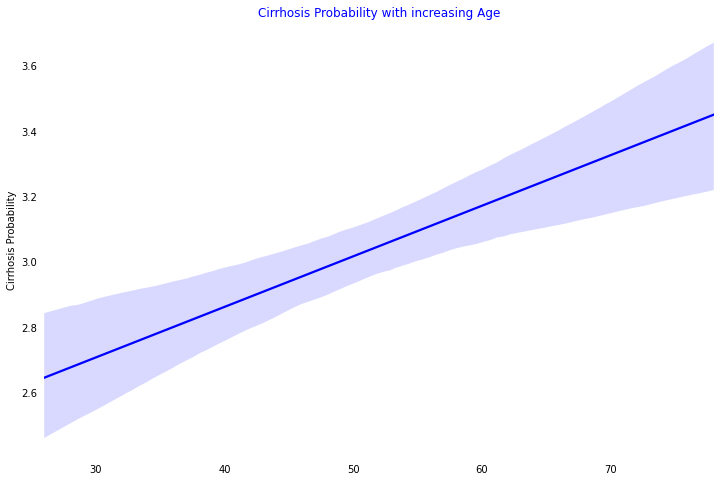

In [98]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=False, color='blue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age'), color='blue') ;


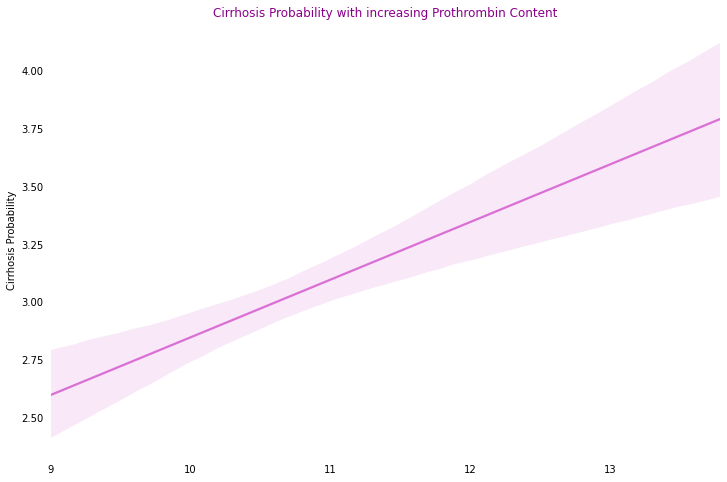

In [99]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=False, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');


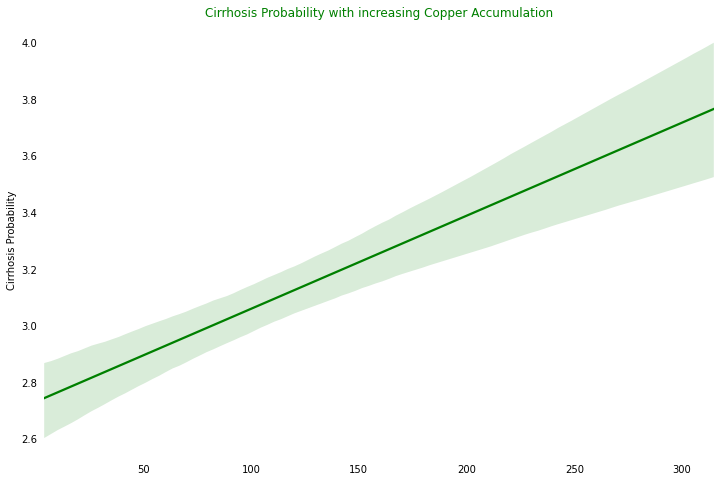

In [100]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=False, color='green')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='green') ;

We can also observe some features such as Platelets and Albumin where the probability of disease decrease with increase in feature value. Lets tally that with some more regression plots.

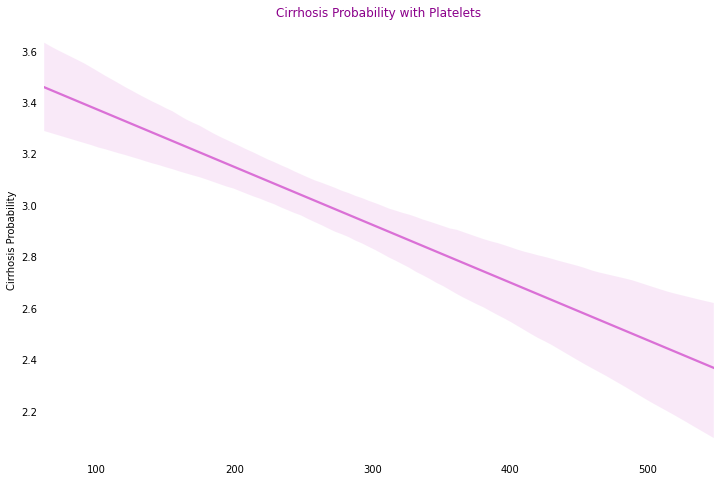

In [101]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=False, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Platelets'), color='darkmagenta');

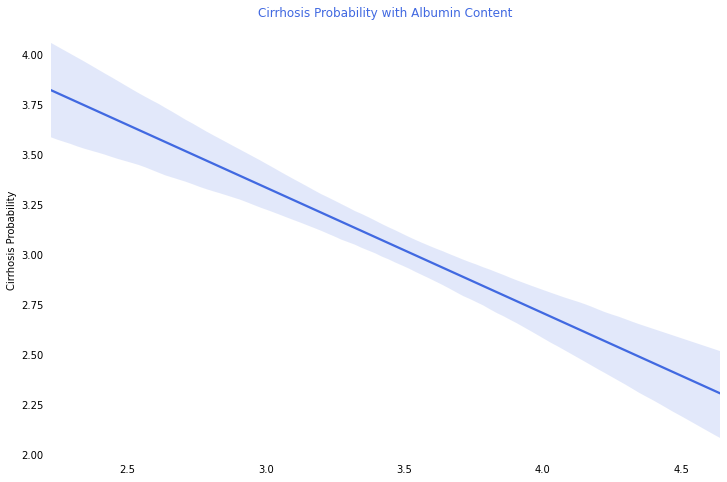

In [102]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=False, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Albumin Content'), color='royalblue');

Also, the barplot of Cholesterol showed both Both ascending and descending patterns. Hence, we could notice a continuous pattern with regression plot.

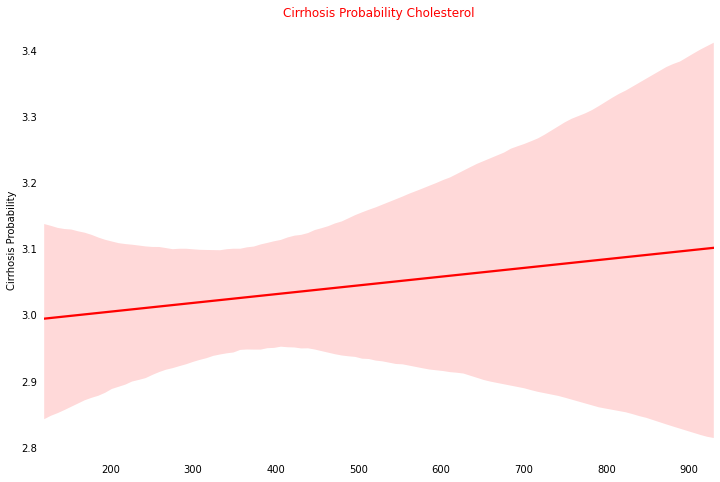

In [103]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=False, color='red')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability Cholesterol'), color='red') ;

# Preprocessing data


In [104]:
# replacing catagorical data with integers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1 

Nowو we divide the target column into two classes 0 and 1 to get a better result in our models

In [107]:
df['Stage'] = df['Stage'].astype('int')

In [108]:
df['Stage']

ID
1      4
2      3
3      4
4      4
5      3
      ..
414    3
415    4
416    3
417    3
418    4
Name: Stage, Length: 418, dtype: int32

In [109]:
df['Stage']=df['Stage'].mask(df['Stage']<=3,0)
df['Stage']

ID
1      4
2      0
3      4
4      4
5      0
      ..
414    0
415    4
416    0
417    0
418    4
Name: Stage, Length: 418, dtype: int32

In [110]:
df['Stage']=df['Stage'].mask(df['Stage']==4,1)
df['Stage']

ID
1      1
2      0
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    0
418    1
Name: Stage, Length: 418, dtype: int32

We will not be using 'Status' and 'N_days' as our features since this will cause data Leakage.

In [111]:
# Setting up Features and Target
X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = df.pop('Stage')

In [112]:
y

ID
1      1
2      0
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    0
418    1
Name: Stage, Length: 418, dtype: int32

# Over_sampling_SMOTE

It is also clear that our dataset classes are out of balance. Hence, we use the over sampling method (SMOTE) to balance the classes.

In [113]:
from imblearn.over_sampling import SMOTE


In [114]:
y.value_counts()

0    274
1    144
Name: Stage, dtype: int64

In [115]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [116]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    274
0    274
Name: Stage, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [118]:
# Number of classes in training Data
y_train.value_counts()

0    219
1    219
Name: Stage, dtype: int64

In [119]:
y_test.value_counts()

0    55
1    55
Name: Stage, dtype: int64

In [120]:
X_train

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
362,0,44,1,0,1,0,0,0.600000,309.500000,3.500000,73.000000,1259.000000,114.700000,108.000000,150.000000,9.900000
99,1,51,0,0,1,0,0,2.300000,178.000000,3.000000,145.000000,746.000000,178.250000,122.000000,119.000000,12.000000
477,0,73,0,1,1,0,0,6.401797,229.035946,3.035371,283.925108,992.935961,162.678598,144.332578,108.278659,11.253708
150,0,55,1,0,0,0,0,0.900000,460.000000,3.030000,57.000000,721.000000,85.250000,174.000000,301.000000,9.400000
304,1,43,1,0,1,1,0,2.900000,426.000000,3.610000,73.000000,5184.000000,267.819349,144.000000,275.000000,10.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,63,0,0,1,0,0,1.788370,356.943034,3.741073,216.440051,1010.414865,94.360438,154.000000,217.796750,10.428957
76,1,49,1,0,1,1,-1,6.600000,244.000000,3.410000,199.000000,1819.000000,170.500000,91.000000,132.000000,12.100000
19,1,59,1,0,1,0,0,5.100000,374.000000,3.510000,140.000000,1919.000000,122.450000,135.000000,322.000000,13.000000
434,0,55,1,0,1,0,0,1.133237,309.500000,3.813382,73.000000,1259.000000,114.700000,108.000000,225.666741,10.016618


In [121]:
y_train

362    0
99     1
477    1
150    0
304    0
      ..
526    1
76     0
19     1
434    1
22     1
Name: Stage, Length: 438, dtype: int32

In [122]:
X_test

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
159,1,57,1,0,0,0,0,0.600000,217.00000,3.620000,13.000000,414.000000,75.950000,119.000000,224.00000,10.500000
136,0,62,1,0,0,0,0,1.100000,399.00000,3.600000,79.000000,3472.000000,155.000000,152.000000,344.00000,10.100000
457,1,35,1,0,0,0,0,4.774028,320.06461,3.648082,113.008578,2116.816754,162.557163,167.276875,217.35992,10.277587
67,0,32,1,0,0,0,0,0.700000,174.00000,4.090000,58.000000,642.000000,71.300000,46.000000,203.00000,10.600000
92,0,36,1,0,0,0,0,1.300000,353.00000,3.670000,73.000000,2039.000000,232.500000,68.000000,380.00000,11.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,1,33,1,0,1,1,0,2.100000,309.50000,3.540000,122.000000,7424.510922,56.760000,108.000000,344.00000,11.000000
132,1,62,0,0,0,0,0,1.500000,331.00000,3.950000,13.000000,577.000000,128.650000,99.000000,165.00000,10.100000
274,0,38,1,0,0,0,0,2.200000,572.00000,3.770000,77.000000,2520.000000,92.000000,114.000000,309.00000,9.500000
152,0,49,1,0,0,0,0,0.500000,217.00000,3.850000,68.000000,453.000000,54.250000,68.000000,270.00000,11.100000


# Model Selection

Logestic regression

KNN

SVM

Random Forest

LogisticRegression with cross validation

XGboost

# LogisticRegression

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logisticRegr = LogisticRegression()

In [125]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [126]:
logisticRegr.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [127]:
predictions = logisticRegr.predict(X_test)

In [128]:
X_test.shape

(110, 16)

In [129]:
predictions

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [130]:
y_test

159    0
136    0
457    1
67     0
92     0
      ..
41     1
132    1
274    1
152    0
73     1
Name: Stage, Length: 110, dtype: int32

Evaluate the predictions

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[36, 19],
       [21, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

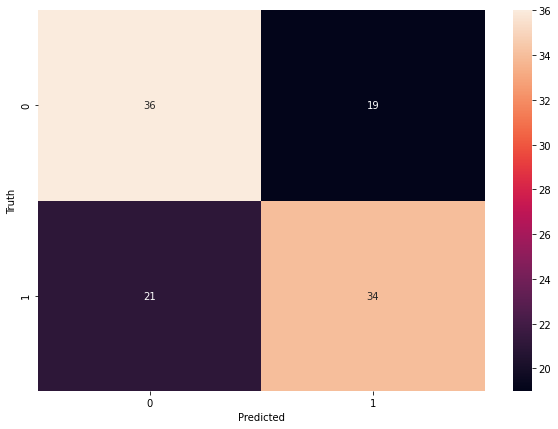

In [132]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [133]:
from sklearn import metrics

In [134]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("F1:",metrics.f1_score(y_test, predictions, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions ,average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions, average='weighted'))


Accuracy: 0.6363636363636364
F1: 0.6362433862433862
Precision: 0.6365441906653426
Recall: 0.6363636363636364


In [135]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y_test, predictions))

AUC :  0.6363636363636364


In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64        55
           1       0.64      0.62      0.63        55

    accuracy                           0.64       110
   macro avg       0.64      0.64      0.64       110
weighted avg       0.64      0.64      0.64       110



# KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [138]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [139]:
knn.score(X_test, y_test)


0.7272727272727273

In [140]:
predictions1 = knn.predict(X_test)

In [141]:
predictions1

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [142]:
from sklearn.metrics import confusion_matrix
predictions1
cm = confusion_matrix(y_test, predictions1)
cm

array([[34, 21],
       [ 9, 46]], dtype=int64)

Text(42.0, 0.5, 'Truth')

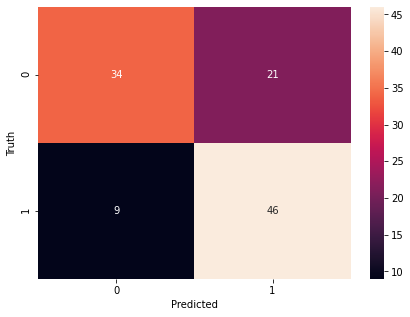

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [144]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69        55
           1       0.69      0.84      0.75        55

    accuracy                           0.73       110
   macro avg       0.74      0.73      0.72       110
weighted avg       0.74      0.73      0.72       110



In [145]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions1))
print("F1:",metrics.f1_score(y_test, predictions1, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions1, average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions1, average='weighted'))


Accuracy: 0.7272727272727273
F1: 0.723987955838073
Precision: 0.7386324192988546
Recall: 0.7272727272727273


In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, predictions1)
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y_test, predictions1))

AUC :  0.7272727272727273


# SVM

In [147]:
from sklearn.svm import SVC
model = SVC()

In [148]:
model.fit(X_train, y_train)

SVC()

In [149]:
model.score(X_test, y_test)

0.7

In [150]:
predictions2 = model.predict(X_test)

In [151]:
predictions2

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

Tune parameters

1. Regularization (C)

In [152]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7

In [153]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.7

2. Gamma

In [154]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.5

3. Kernel

In [155]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [156]:
model_linear_kernal.score(X_test, y_test)

0.7181818181818181

In [157]:
from sklearn.metrics import confusion_matrix
y_pred = predictions2
cm = confusion_matrix(y_test, y_pred)
cm

array([[37, 18],
       [15, 40]], dtype=int64)

Text(42.0, 0.5, 'Truth')

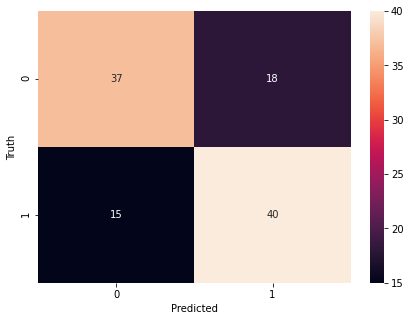

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        55
           1       0.69      0.73      0.71        55

    accuracy                           0.70       110
   macro avg       0.70      0.70      0.70       110
weighted avg       0.70      0.70      0.70       110



In [160]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions2))
print("F1:",metrics.f1_score(y_test, predictions2, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions2, average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions2, average='weighted'))


Accuracy: 0.7
F1: 0.6997766934083204
Precision: 0.7005968169761274
Recall: 0.7


In [161]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, predictions2)
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y_test, predictions2))

AUC :  0.7


# RandomForest

In [162]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [163]:
model.score(X_test, y_test)

0.7909090909090909

In [164]:
predictions3 = model.predict(X_test)

In [165]:
predictions3

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions3)
cm

array([[48,  7],
       [16, 39]], dtype=int64)

Text(69.0, 0.5, 'Truth')

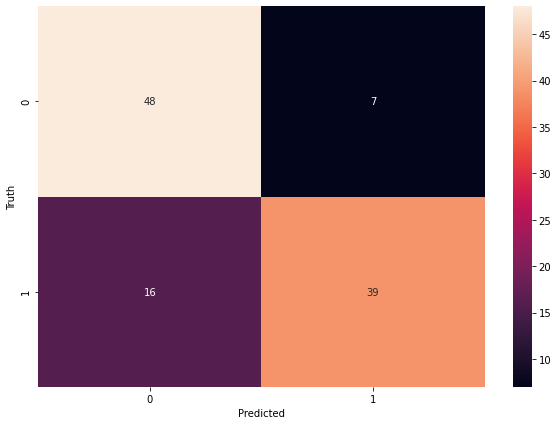

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [168]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81        55
           1       0.85      0.71      0.77        55

    accuracy                           0.79       110
   macro avg       0.80      0.79      0.79       110
weighted avg       0.80      0.79      0.79       110



In [169]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions3))
print("F1:",metrics.f1_score(y_test, predictions3, average='weighted'))
print("Precision:",metrics.precision_score(y_test, predictions3, average='weighted'))
print("Recall:",metrics.recall_score(y_test, predictions3, average='weighted'))


Accuracy: 0.7909090909090909
F1: 0.7894999583992013
Precision: 0.7989130434782608
Recall: 0.7909090909090909


In [170]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, predictions3)
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y_test, predictions3))

AUC :  0.7909090909090909


# LogisticRegression with cross validation

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=5000, solver='saga')
skf = StratifiedKFold(n_splits=20, random_state=3, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  log_model.fit(X_train, y_train)
  score = log_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.6428571428571429
For Fold 2 the accuracy is 0.7142857142857143
For Fold 3 the accuracy is 0.6785714285714286
For Fold 4 the accuracy is 0.6428571428571429
For Fold 5 the accuracy is 0.6428571428571429
For Fold 6 the accuracy is 0.7857142857142857
For Fold 7 the accuracy is 0.7857142857142857
For Fold 8 the accuracy is 0.6428571428571429
For Fold 9 the accuracy is 0.5925925925925926
For Fold 10 the accuracy is 0.8148148148148148
For Fold 11 the accuracy is 0.6296296296296297
For Fold 12 the accuracy is 0.6666666666666666
For Fold 13 the accuracy is 0.6296296296296297
For Fold 14 the accuracy is 0.5555555555555556
For Fold 15 the accuracy is 0.7037037037037037
For Fold 16 the accuracy is 0.5925925925925926
For Fold 17 the accuracy is 0.6666666666666666
For Fold 18 the accuracy is 0.7037037037037037
For Fold 19 the accuracy is 0.7037037037037037
For Fold 20 the accuracy is 0.6666666666666666

Logestic Regression Mean Accuracy =  0.6730820105820106


In [172]:
from sklearn.metrics import classification_report
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))
#confuison matrix

              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.62      0.77      0.69        13

    accuracy                           0.67        27
   macro avg       0.68      0.67      0.66        27
weighted avg       0.68      0.67      0.66        27



In [173]:
print("Accuracy:",metrics.accuracy_score(y.iloc[test_index], log_model_predict))
print("F1:",metrics.f1_score(y.iloc[test_index], log_model_predict, average='weighted'))
print("Precision:",metrics.precision_score(y.iloc[test_index], log_model_predict, average='weighted'))
print("Recall:",metrics.recall_score(y.iloc[test_index], log_model_predict, average='weighted'))


Accuracy: 0.6666666666666666
F1: 0.6639080459770115
Precision: 0.678030303030303
Recall: 0.6666666666666666


In [174]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

AUC :  0.7197802197802198


# XGboost

In [175]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  model.fit(X_train, y_train)
  score = model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.8
For Fold 2 the accuracy is 0.7454545454545455
For Fold 3 the accuracy is 0.7818181818181819
For Fold 4 the accuracy is 0.8363636363636363
For Fold 5 the accuracy is 0.8
For Fold 6 the accuracy is 0.8
For Fold 7 the accuracy is 0.7818181818181819
For Fold 8 the accuracy is 0.7454545454545455
For Fold 9 the accuracy is 0.8333333333333334
For Fold 10 the accuracy is 0.8333333333333334

XGboost model Mean Accuracy =  0.7957575757575757


In [176]:
from sklearn.metrics import classification_report
XGB_model_predict = model.predict(test)
XGB_model_predict_proba = model.predict_proba(test)

print(classification_report(y.iloc[test_index], XGB_model_predict))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.85      0.81      0.83        27

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [177]:
print("Accuracy:",metrics.accuracy_score(y.iloc[test_index], XGB_model_predict))
print("F1:",metrics.f1_score(y.iloc[test_index], XGB_model_predict, average='weighted'))
print("Precision:",metrics.precision_score(y.iloc[test_index], XGB_model_predict, average='weighted'))
print("Recall:",metrics.recall_score(y.iloc[test_index], XGB_model_predict, average='weighted'))


Accuracy: 0.8333333333333334
F1: 0.8332761578044596
Precision: 0.8337912087912087
Recall: 0.8333333333333334


In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y.iloc[test_index], XGB_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], XGB_model_predict_proba[:,1]))

AUC :  0.9012345679012346
